In [10]:
import numpy as np
#import matplotlib as plt
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob, os
import random
import tensorflow as tf
from tensorflow import keras
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cf
import pickle 
from datetime import date
import xarray as xr
import netCDF4 as nc
#from u_interpolate_small import regrid_irregular_quick
#from ndays import numOfDays
import glob
import calendar
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
val_target_FILENAME = "val_target.npy"
val_input_FILENAME = "val_input.npy"

In [3]:
# read in data
val_input_dataset=np.load(val_input_FILENAME)
val_target_dataset=np.load(val_target_FILENAME)
print(val_input_dataset.shape)


(1441920, 124)


In [4]:
# training input
# temp
temp_surface = val_input_dataset[:,59]
temp_mid = val_input_dataset[:,29]
temp_top = val_input_dataset[:,0]

# specific humidity
sp_humidity_surface = val_input_dataset[:,60+29]
sp_humidity_mid = val_input_dataset[:,60+29]
sp_humidity_top = val_input_dataset[:,60]

# surface pressure
surface_pressure = val_input_dataset[:,-4]

# Insolation
insolation = val_input_dataset[:,-3]

# Surface latent heat flux
surface_latent_heat = val_input_dataset[:,-2]

# Surface sensible heat flux
surface_sensible_heat = val_input_dataset[:,-1]



In [11]:
# training target
rain_rate = val_target_dataset[:,-5]


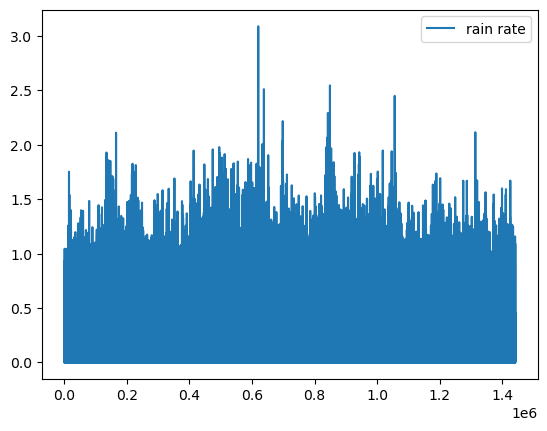

In [12]:
# # plot rain
plt.figure()
plt.plot(rain_rate,label='rain rate [m/s]')
#plt.plot(temp_top,linestyle='',marker='o', markersize=2,label='temp_top')
plt.legend()




In [17]:
# building model
num_of_epochs= 10
num_of_samples = temp_surface.shape[0] 
num_of_inputs = 10

X_train= np.zeros((num_of_samples,num_of_inputs, 1))
X_train[:,0,0]=temp_surface
X_train[:,1,0]=temp_mid
X_train[:,2,0]=temp_top
X_train[:,3,0]=sp_humidity_surface
X_train[:,4,0]=sp_humidity_mid
X_train[:,5,0]=sp_humidity_top
X_train[:,6,0]=surface_pressure
X_train[:,7,0]=insolation
X_train[:,8,0]=surface_latent_heat
X_train[:,9,0]=surface_sensible_heat

y_train=rain_rate

In [18]:
print(X_train.shape)
print(y_train.shape)

(1441920, 10, 1)
(1441920,)


In [34]:
x_tr, x_test, y_tr, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [35]:
x_tr.shape

(720960, 10, 1)

In [36]:
num_of_epochs = 2

In [39]:
from tensorflow import keras
#import tensorflow.keras.model
#from tensorflow.keras.layers import Conv1D, Flatten, Dense
#from tensorflow.keras.layers import Sequential

model = keras.models.Sequential()
model.add(keras.layers.Conv1D(32,kernel_size=2,activation='relu',input_shape=(num_of_inputs,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[keras.metrics.Accuracy()])

 

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 9, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,993 (35.13 KB)

 Trainable params: 2,997 (11.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,996 (23.43 KB)

In [40]:
model.fit(x_tr,y_tr,epochs=num_of_epochs,batch_size=1)


Epoch 1/2
720960/720960 ━━━━━━━━━━━━━━━━━━━━ 441s 611us/step - accuracy: 0.0000e+00 - loss: 0.0071
Epoch 2/2
720960/720960 ━━━━━━━━━━━━━━━━━━━━ 454s 630us/step - accuracy: 0.0000e+00 - loss: 0.0062


In [42]:
x_test.shape
x_tr.shape


(720960, 10, 1)

In [43]:
y_test.shape

(720960,)

In [46]:
frames= np.zeros((x_test.shape[0],num_of_inputs, 1))
predicted_y= np.zeros((y_test.shape[0]))

for i in range(0,x_test.shape[0],1):
    frames = x_test[i,:,:] # 
    #original_frame[i,:,:] = y_test[i,:,:] # 
    
    # Extract the model's prediction and post-process it.
#    predicted_frames[i,:,:] = np.squeeze(model.predict(x_test[i,:,:] )))
    predicted_y[i] = model.predict(frames)
    
   

ValueError: Exception encountered when calling Conv1D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_4_1/conv1d_4_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4_1/conv1d_4_1/convolution/ExpandDims, sequential_4_1/conv1d_4_1/convolution/ExpandDims_1)' with input shapes: [10,1,1,1], [1,2,1,32].[0m

Arguments received by Conv1D.call():
  • inputs=tf.Tensor(shape=(10, 1, 1), dtype=float32)